# Importing Libraries 📖

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('Fish.csv')

In [3]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
data.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

# Preprocessing 🛠️

In [5]:
len(list(data['Species'].unique()))

7

In [6]:
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])

fish_type = {index: type for index, type in enumerate(encoder.classes_)}
fish_type

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

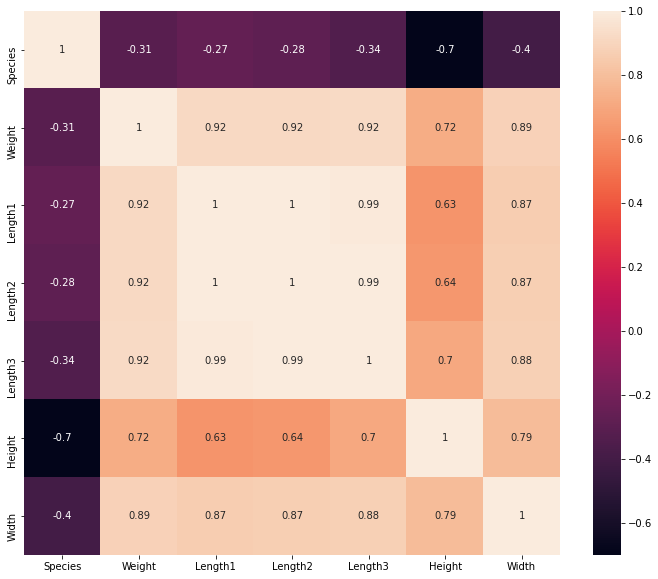

In [7]:
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [8]:
X = data.drop('Species', axis = 1)
y = data['Species']

In [9]:
X

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [10]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [11]:
X

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...
154,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,-1.078676,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,-1.082039,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,-1.061022,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


# Model 

## Logistic Regression Model 📏

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

### Logistic Regression Score 🎯

In [13]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

print(str(logistic_model.score(X_test, y_test) * 100) + "%")

77.08333333333334%


## Neural Network Model 🧠

In [14]:
inputs = tf.keras.Input(shape = (6, ))
x = tf.keras.layers.Dense(64, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(16, activation = 'relu')(x)
x = tf.keras.layers.Dense(16, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(7, activation = 'softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 150

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/150
3/3 [==============================] - 1s 93ms/step - loss: 2.0259 - accuracy: 0.0341 - val_loss: 1.9717 - val_accuracy: 0.0000e+00
Epoch 2/150
3/3 [==============================] - 0s 11ms/step - loss: 1.9870 - accuracy: 0.0568 - val_loss: 1.9448 - val_accuracy: 0.1304
Epoch 3/150
3/3 [==============================] - 0s 11ms/step - loss: 1.9528 - accuracy: 0.2273 - val_loss: 1.9200 - val_accuracy: 0.3043
Epoch 4/150
3/3 [==============================] - 0s 10ms/step - loss: 1.9243 - accuracy: 0.2955 - val_loss: 1.8963 - val_accuracy: 0.5217
Epoch 5/150
3/3 [==============================] - 0s 10ms/step - loss: 1.8981 - accuracy: 0.3295 - val_loss: 1.8772 - val_accuracy: 0.5652
Epoch 6/150
3/3 [==============================] - 0s 11ms/step - loss: 1.8771 - accuracy: 0.4205 - val_loss: 1.8602 - val_accuracy: 0.5652
Epoch 7/150
3/3 [==============================] - 0s 11ms/step - loss: 1.8566 - accuracy: 0.5000 - val_loss: 1.8421 - val_accuracy: 0.4783
Epoch 8/150
3/3 

### Loss Graph 📈

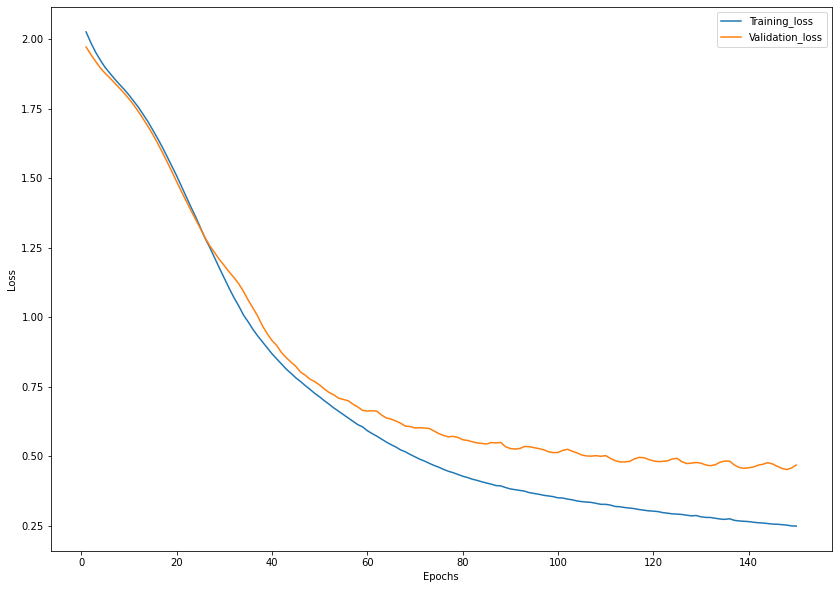

In [15]:
plt.figure(figsize = (14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label = 'Training_loss')
plt.plot(epochs_range, val_loss, label = 'Validation_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
np.argmin(val_loss)

147

### Neural Network Score 🎯

In [17]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.5540 - accuracy: 0.7917


[0.5540483593940735, 0.7916666865348816]

In [21]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(logistic_model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, y_train)
print(result)


0.8378378378378378
